 Implement Logistic Regression from scratch to classify whether a tumor is malignant (1) or benign (0)
   using the Breast Cancer dataset (load_breast_cancer).

   * Use the sigmoid activation and gradient descent for optimization.
   * Print accuracy on the training data.
   

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

### Data Preparation
1. load the dataset
2. set X and y
3. train test split
4. standardize data

In [56]:
brcr = load_breast_cancer()
X = brcr.data[:, [0,2]]
y = brcr.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementation

##### Mathematical Functions:
- sigmoid
- log loss

In [59]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y, y_hat):
    return -(1/len(y)) * np.sum(y*np.log(y_hat + 1e-9) + (1 - y)*np.log(1 - y_hat + 1e-9))

##### Logistic Regression (Gradient Descent):
- weights, bias, losses
- compute GD for weights and bias
    - lin = Xw + b
    - y_hat = sigmoid(lin)
    - calculate slope w.r.t weights `(1/m) * np.dot(X.T, y_hat - y)` and bias `(1/m) * np.sum(y_hat - y)`
    - step towards slope where error reduced

In [60]:
def logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for _ in range(epochs):
        linear = np.dot(X, weights) + bias 
        y_hat = sigmoid(linear)
        dw = (1/m) * np.dot(X.T, y_hat - y)
        db = (1/m) * np.sum(y_hat - y)
        weights -= lr * dw
        bias -= lr * db
        losses.append(loss(y, y_hat))
    
    return weights, bias, losses

In [61]:
w, b, losses = logistic_regression(X_train, y_train, lr=0.1, epochs=2000)

def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5)

### Evaluation

- calculate predicted y 
- compute scores

In [62]:
y_pred = predict(X_test, w, b)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

print(cm)
print(clr)

[[36  7]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.91      0.99      0.95        71

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



### Decision Boundary

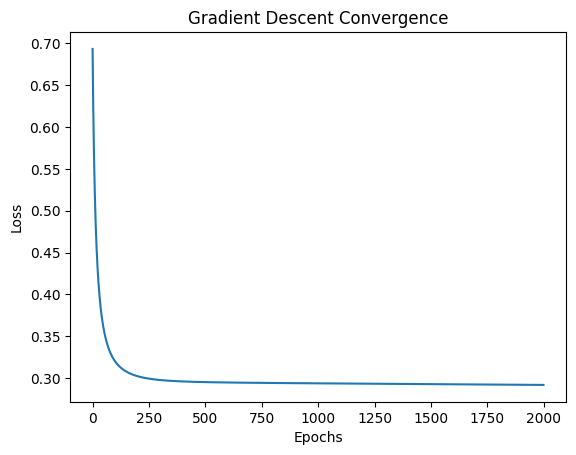

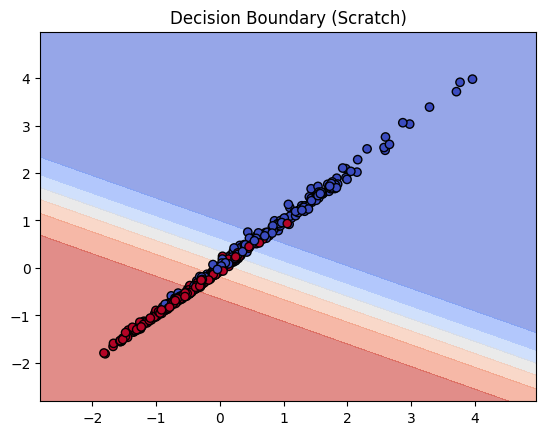

In [63]:
# Loss Convergence
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence")
plt.show()

# Decision Boundary
x_min, x_max = X_train[:,0].min()-1, X_train[:,0].max()+1
y_min, y_max = X_train[:,1].min()-1, X_train[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = sigmoid(np.dot(grid, w) + b).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.6, cmap="coolwarm")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors="k", cmap="coolwarm")
plt.title("Decision Boundary (Scratch)")
plt.show()
